In [1]:
import numpy as np
from matplotlib import pyplot as plt
train_set = np.array([[3,3,1],[4,3,1],[1,1,-1]])
w = np.zeros((1,2))
b = np.zeros((1,1))
lr=1

In [2]:
i= 0
while i < 30:
    for x in train_set: 
        xs = x[:2]
        y = x[-1]
        res = np.sign((np.dot(xs,w.T)+b))
        if (res != y):
            w=w+np.dot(y,xs)
            b=b+y
            print(x)
            print(w[0][0],"*x1+",w[0][1],"*x_2+",b[0][0])
        i += 1

[3 3 1]
3.0 *x1+ 3.0 *x_2+ 1.0
[ 1  1 -1]
2.0 *x1+ 2.0 *x_2+ 0.0
[ 1  1 -1]
1.0 *x1+ 1.0 *x_2+ -1.0
[ 1  1 -1]
0.0 *x1+ 0.0 *x_2+ -2.0
[3 3 1]
3.0 *x1+ 3.0 *x_2+ -1.0
[ 1  1 -1]
2.0 *x1+ 2.0 *x_2+ -2.0
[ 1  1 -1]
1.0 *x1+ 1.0 *x_2+ -3.0


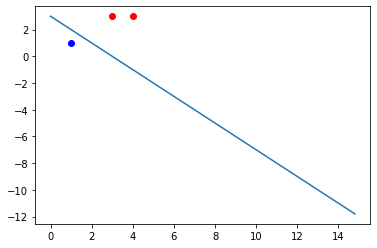

In [3]:
plt.figure()
for i in range(len(train_set)):
    if train_set[i][2] == 1:
        plt.plot(train_set[i][0],train_set[i][1],'ro')
    if train_set[i][2] == -1:
        plt.plot(train_set[i][0],train_set[i][1],'bo')

line_x = np.arange(0,15,0.2)
line_y = np.zeros(line_x.shape)

for i in range(len(line_x)):
    line_y[i] = (w[0][0] * line_x[i] + b)/(-w[0][1])
plt.plot(line_x, line_y)

# 对偶形式

In [96]:
sample = np.array([[3,3],[4,3],[1,1]])
G = np.dot(sample,sample.T)
y=np.array([1,1,-1])

In [97]:
G[:,0]

array([18, 21,  6])

In [98]:
alpha = np.zeros(sample.shape[0])
b=0
for count in range(100):
    for i in range(G.T.shape[0]):
        x,y_ = sample[i],y[i]
        temp = np.dot(np.multiply(alpha,y),G[:,i])
        # print(temp)
        if y_ * (temp +b) <= 0:
            alpha[i] += 1;
            b += y_
        
w = np.zeros(sample.shape[1])
for j in range(sample.shape[0]):
    w += alpha[j] * y[j] * sample[j]
    print(w)
print(alpha,b)
print(w,b)

[-5. -5.]
[-10. -10.]
[-15. -15.]
[2. 0. 5.] -3
[-15. -15.] -3


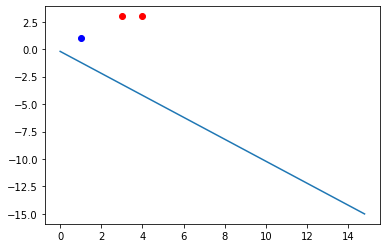

In [94]:
plt.figure()
for i in range(len(sample)):
    if y[i] == 1:
        plt.plot(sample[i][0],sample[i][1],'ro')
    if y[i] == -1:
        plt.plot(sample[i][0],sample[i][1],'bo')

line_x = np.arange(0,15,0.2)
line_y = np.zeros(line_x.shape)

for i in range(len(line_x)):
    line_y[i] = (w[0] * line_x[i] + b)/(-w[1])
plt.plot(line_x, line_y)